# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


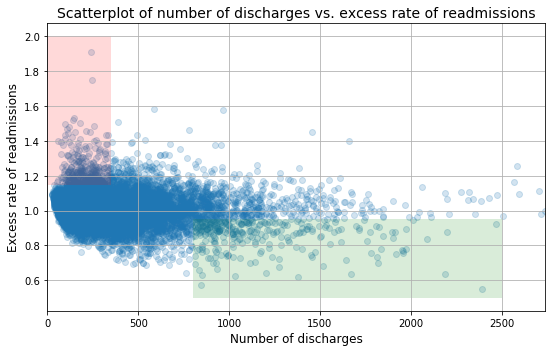

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<b>Evaluation of analysis presented</b>

Overall, I do not agree with the above analysis due to its lack of statistical rigor, incorrect observations, and limited viewpoint (i.e. EDA strategy). For example, no effort was made to establish a baseline hypothesis to give the reader a sense of what the underlying goal of the study was. Furthermore, basic frequentist statistical metrics (i.e. z-stat | t-stat) were not established before making conclusions (ex. stating correlations, making recommendations, etc). 

The report stated that the rate of readmissions is trending down while the number of discharges was increasing, but the plot given wouldn't identify this trend since it wasn't a time series plot. Finally, no attention was paid to differences between specific ailments, which is likely a more important insight compared to establishing whether small or large hospitals have higher excess rates of readmission. 

<b> Key Question:</b><br> Do excess readmission ratio's vary by ailment? 

<b>Ho:</b> No differences in excess readmission ratios by ailment <br>
<b>Ha:</b> Differences in excess readmission ratios by ailment  

In [5]:
import itertools
from scipy import stats

#Clean data further. Dropping nan's in excess readmission ratio column as this is the key column tested.
clean_hospital_read_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


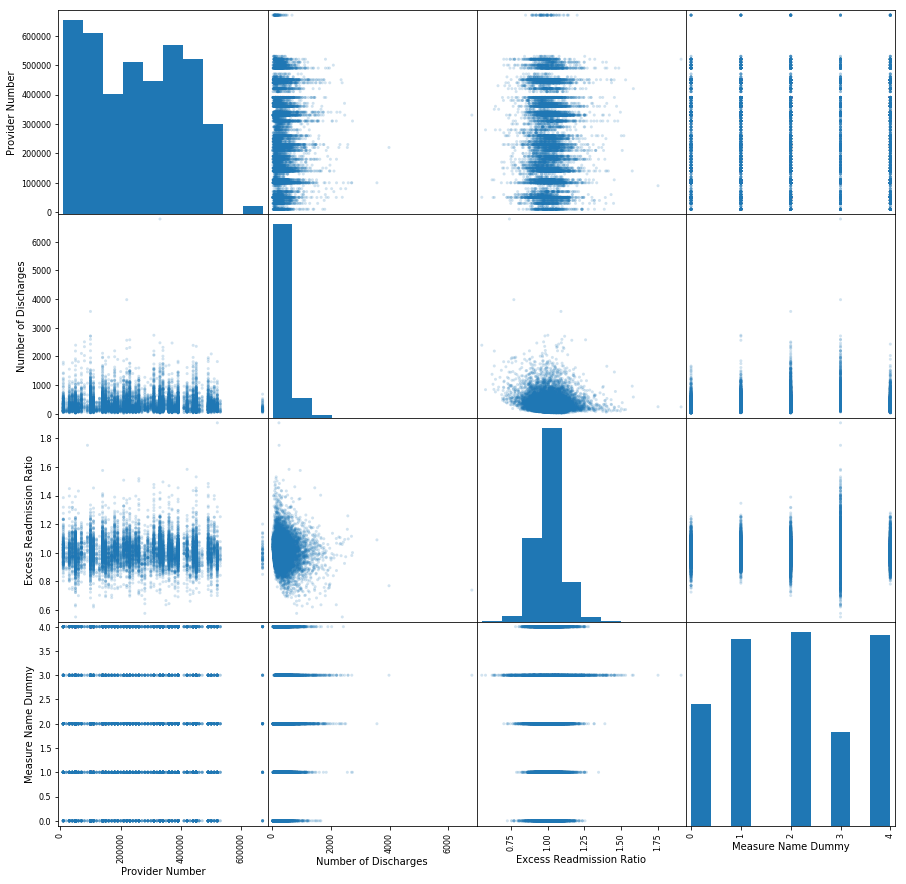

      Provider Number State            Measure Name  Number of Discharges  \
1832           210035    MD       READM-30-AMI-HRRP                    25   
104            210035    MD  READM-30-HIP-KNEE-HRRP                   190   
2663           210035    MD        READM-30-PN-HRRP                   348   
6949           210035    MD        READM-30-HF-HRRP                   428   
6245           210035    MD      READM-30-COPD-HRRP                   608   

      Excess Readmission Ratio  Measure Name Dummy  
1832                    1.0914                   0  
104                     1.2843                   3  
2663                    1.0685                   4  
6949                    0.9962                   2  
6245                    1.0062                   1  


In [6]:
#Do efficient EDA to look for any patterns in which to help structure hypothesis
matrix_df = clean_hospital_read_df[['Provider Number','State','Measure Name','Number of Discharges','Excess Readmission Ratio']]

#Create integer dummy codes for measure name, so scatter matrix automatically plots data
matrix_df.loc[:, 'Measure Name'] = matrix_df['Measure Name'].astype('category')
matrix_df.loc[:, 'Measure Name Dummy'] = matrix_df['Measure Name'].cat.codes

#Create Scatterplot matrix 
pd.plotting.scatter_matrix(matrix_df, alpha=0.2, figsize=(15, 15))
plt.show()

print(matrix_df[matrix_df['Provider Number'] == 210035])

In [9]:
#Populate list of differences between statistics for all possible ailment combinations (mean, std)
#Create empty list for each combination metric
mean_diff = []
std_diff = []
feature_combo = []

#Loop through df and perform desired calculation for each column (this could be translated into function for broader use)
def feature_comp(df, feature_col):     
    
    #Get rollup statistics for desired feature (mean, std, samp_var, count
    df_agg = df.groupby(feature_col)['Excess Readmission Ratio'].agg(['mean', 'std','count']).reset_index()
    df_agg['samp_var'] = df_agg['std'] **2 / df_agg['count']
    
    #Iterate through all combinations of given feature calculating differences for mean, std 
    for idx, col in enumerate(df_agg.columns): 
        for a, b in itertools.combinations(df_agg[col], 2):
            if col == feature_col:
                feature_combo.append((a, b))
            elif col == str('mean'):
                mu_diff = a - b 
                mean_diff.append(mu_diff)
            elif col == str('samp_var'):
                sigma_diff = float(np.sqrt([a + b])) 
                std_diff.append(sigma_diff)
            else:
                continue

#Input desired df and feature_col
feature_comp(clean_hospital_read_df, 'Measure Name')
                
#Form new df for each combination, then calculate z_score, p_value, and determine is Ho can be rejected.
feature_df = pd.DataFrame({'feature_combo':feature_combo, 'mean_diff':mean_diff, 'std_diff':std_diff})  
feature_df.loc[:, 'z_score'] = feature_df['mean_diff'] / feature_df['std_diff']
feature_df.loc[:, 'p_value'] = feature_df['z_score'].apply(lambda x: round(stats.norm.sf(abs(x)),4)*2) #Two-tailed
feature_df.loc[:, 'reject_null'] = feature_df['p_value'].apply(lambda x: 'Yes' if x < 0.01 else 'No') #Significance @ 1%

#Print summary df where null hypothesis was rejected
reject_null_df = feature_df[feature_df['reject_null'] == 'Yes']
print(reject_null_df[['feature_combo','z_score','p_value','reject_null']].sort_values('z_score'))

                                  feature_combo   z_score  p_value reject_null
7    (READM-30-HF-HRRP, READM-30-HIP-KNEE-HRRP) -5.028034      0.0         Yes
5  (READM-30-COPD-HRRP, READM-30-HIP-KNEE-HRRP) -4.933580      0.0         Yes
2   (READM-30-AMI-HRRP, READM-30-HIP-KNEE-HRRP) -4.107160      0.0         Yes
9    (READM-30-HIP-KNEE-HRRP, READM-30-PN-HRRP)  4.779356      0.0         Yes


<b>Statistical versus Practical Significance</b>

Based on the statistical results, Hip/Knee replacements have a significantly higher Excess Readmission ratio, but given we're not subject domain experts, it's difficult to say why that is. That's the key difference in statistical versus practical significance, meaning a domain expert may provide context to explain the clear difference (i.e. why this ratio may be very difficult to reduce or perhaps why it isn't the right measurement). 

<b>Conclusion</b>

Given the analysis, we saw a clear statistical difference in Hip/Knee Excess Readmission Rates versus the other four ailments in the database. We didn't partition by hosipital size, instead opting for an equal weighted comparison to look for patterns, thereby avoiding bias in small versus large hosipitals by ailment. 

Finding the root cause of why hip/knee ailments lead to higher readmission rates would be interesting to know. Thinking about it practically, it would makes since since hips/knees are constantly being stressed each day and many patients often return to hospitals for therapy or follow up surgery. It seems reasonable to recommend that the US Government not treat each ailment equally when applying declining Medicare payments based on Excess Readmission Ratios. Instead, it would make sense to treat each ailment separately and compare across hospitals and states (I also looked at states and found 2/3 of state combinations had significant differences). 